In [1]:
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('/content/diabetes.csv')

In [7]:
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
print(df.tail())


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


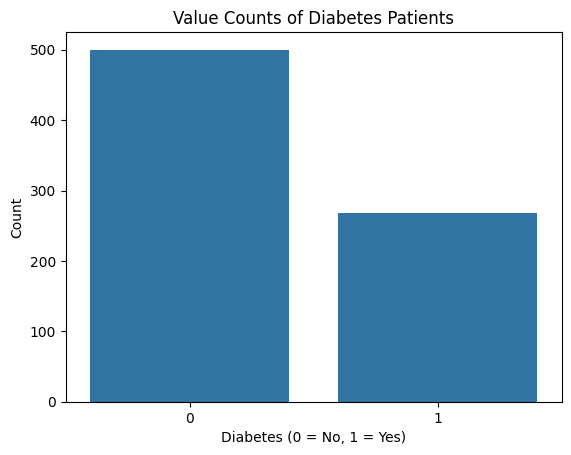

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='outcome', data=df)
plt.title('Value Counts of Diabetes Patients')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [18]:

X = df.drop('outcome', axis=1)
y = df['outcome']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train.shape, X_test.shape


((537, 8), (231, 8))

In [22]:
import time
from sklearn.ensemble import RandomForestClassifier


classifier_rf = RandomForestClassifier(
    random_state=41,
    n_jobs=-1,
    max_depth=5,
    n_estimators=100,
    oob_score=True
)


start_time = time.time()
classifier_rf.fit(X_train, y_train)
end_time = time.time()


print(f"Training completed in {end_time - start_time:.4f} seconds")


Training completed in 0.2437 seconds


In [24]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = classifier_rf.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[125  26]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



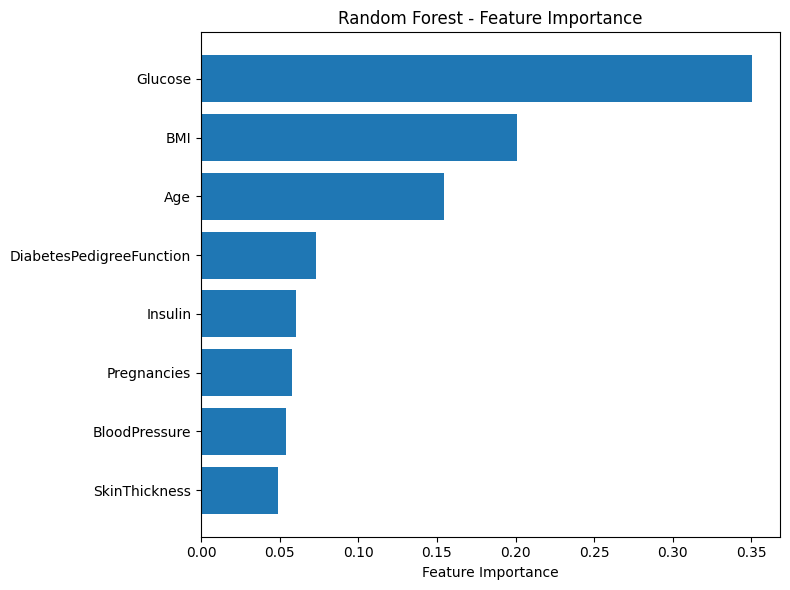

In [25]:
import matplotlib.pyplot as plt
import numpy as np


importances = classifier_rf.feature_importances_
feature_names = X.columns


indices = np.argsort(importances)


plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()
